<a href="https://colab.research.google.com/github/callumeppz/ParalelComputingCW/blob/main/FinalDoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [190]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [191]:
!wget -q http://archive.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz

In [192]:
!tar xf spark-3.1.1-bin-hadoop3.2.tgz

In [193]:
!pip install -q findspark

In [194]:
import os

In [195]:
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [196]:
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [197]:
import findspark
findspark.init()

In [198]:
from pyspark import SparkContext, SparkConf
import random
import matplotlib.pyplot as plt
import sys
import numpy as np


Estimated Pi: 3.1412


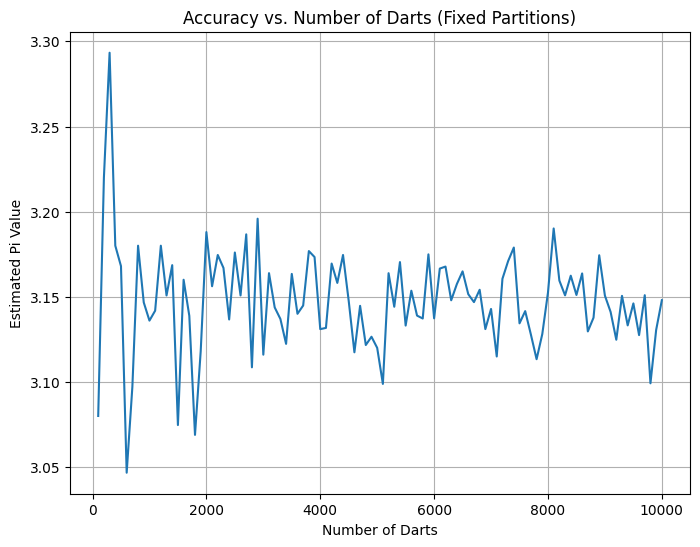

In [199]:
conf = SparkConf().setAppName('PiTrial')
sc = SparkContext()

def inside(p):
    x, y = random.random(), random.random()
    return x*x + y*y < 1

def estimate_pi(num_samples, num_partitions):
    count = sc.parallelize(range(0, num_samples), num_partitions) \
             .filter(inside).count()

    return 4.0 * count / num_samples

# Part (A) - estimating pi with a given set of darts and partitions
num_samples = 10000
num_partitions = 32
estimated_pi = estimate_pi(num_samples, num_partitions)
print("Estimated Pi:", estimated_pi)

# Part (B) - producing a figure of Accuracy vs Number of darts
num_partitions = 32
num_samples_for_plot = np.arange(100, num_samples + 1, 100)

# Estimate Pi
pi_estimates = [estimate_pi(samples, num_partitions) for samples in num_samples_for_plot]

plt.figure(figsize=(8, 6))
plt.plot(num_samples_for_plot, pi_estimates)
plt.title('Accuracy vs. Number of Darts (Fixed Partitions)')
plt.xlabel('Number of Darts')
plt.ylabel('Estimated Pi Value')
plt.grid(True)
plt.show()

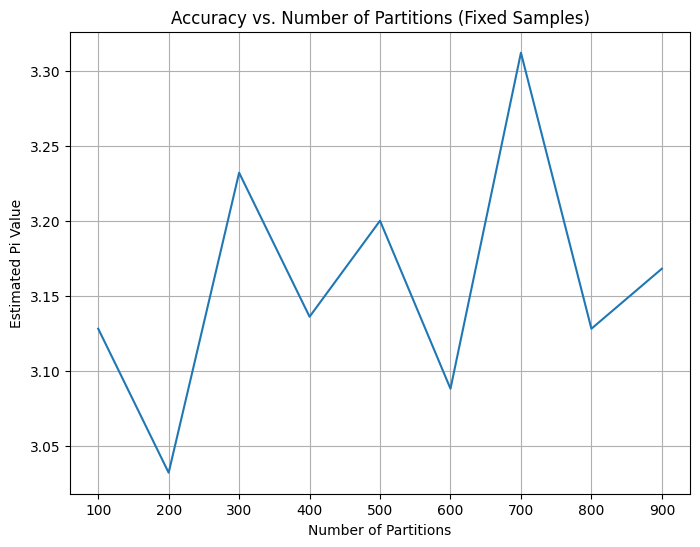

In [200]:
# Part (C) - Producing a figure of Accuracy vs Number of partitions
partition_count = np.arange(100, 1000, 100)
sample_counts = 500

# Estimate Pi
pi_estimates_part = [estimate_pi(sample_counts, partitions) for partitions in partition_count]

plt.figure(figsize=(8, 6))
plt.plot(partition_count, pi_estimates_part)
plt.title('Accuracy vs. Number of Partitions (Fixed Samples)')
plt.xlabel('Number of Partitions')
plt.ylabel('Estimated Pi Value')
plt.grid(True)
plt.show()

sc.stop()